In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('bodyfat.csv')

In [3]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Density,252.0,1.055574,0.019031,0.995,1.0414,1.0549,1.0704,1.1089
BodyFat,252.0,19.150794,8.368740,0.000,12.4750,19.2000,25.3000,47.5000
Age,252.0,44.884921,12.602040,22.000,35.7500,43.0000,54.0000,81.0000
Weight,252.0,178.924405,29.389160,118.500,159.0000,176.5000,197.0000,363.1500
Height,252.0,70.148810,3.662856,29.500,68.2500,70.0000,72.2500,77.7500
Neck,252.0,37.992063,2.430913,31.100,36.4000,38.0000,39.4250,51.2000
Chest,252.0,100.824206,8.430476,79.300,94.3500,99.6500,105.3750,136.2000
Abdomen,252.0,92.555952,10.783077,69.400,84.5750,90.9500,99.3250,148.1000
Hip,252.0,99.904762,7.164058,85.000,95.5000,99.3000,103.5250,147.7000
Thigh,252.0,59.405952,5.249952,47.200,56.0000,59.0000,62.3500,87.3000


In [6]:
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [7]:
df.shape

(252, 15)

In [8]:
data = df.copy()

In [9]:
data = data.drop('Density',axis=1)
features = list(data.columns)

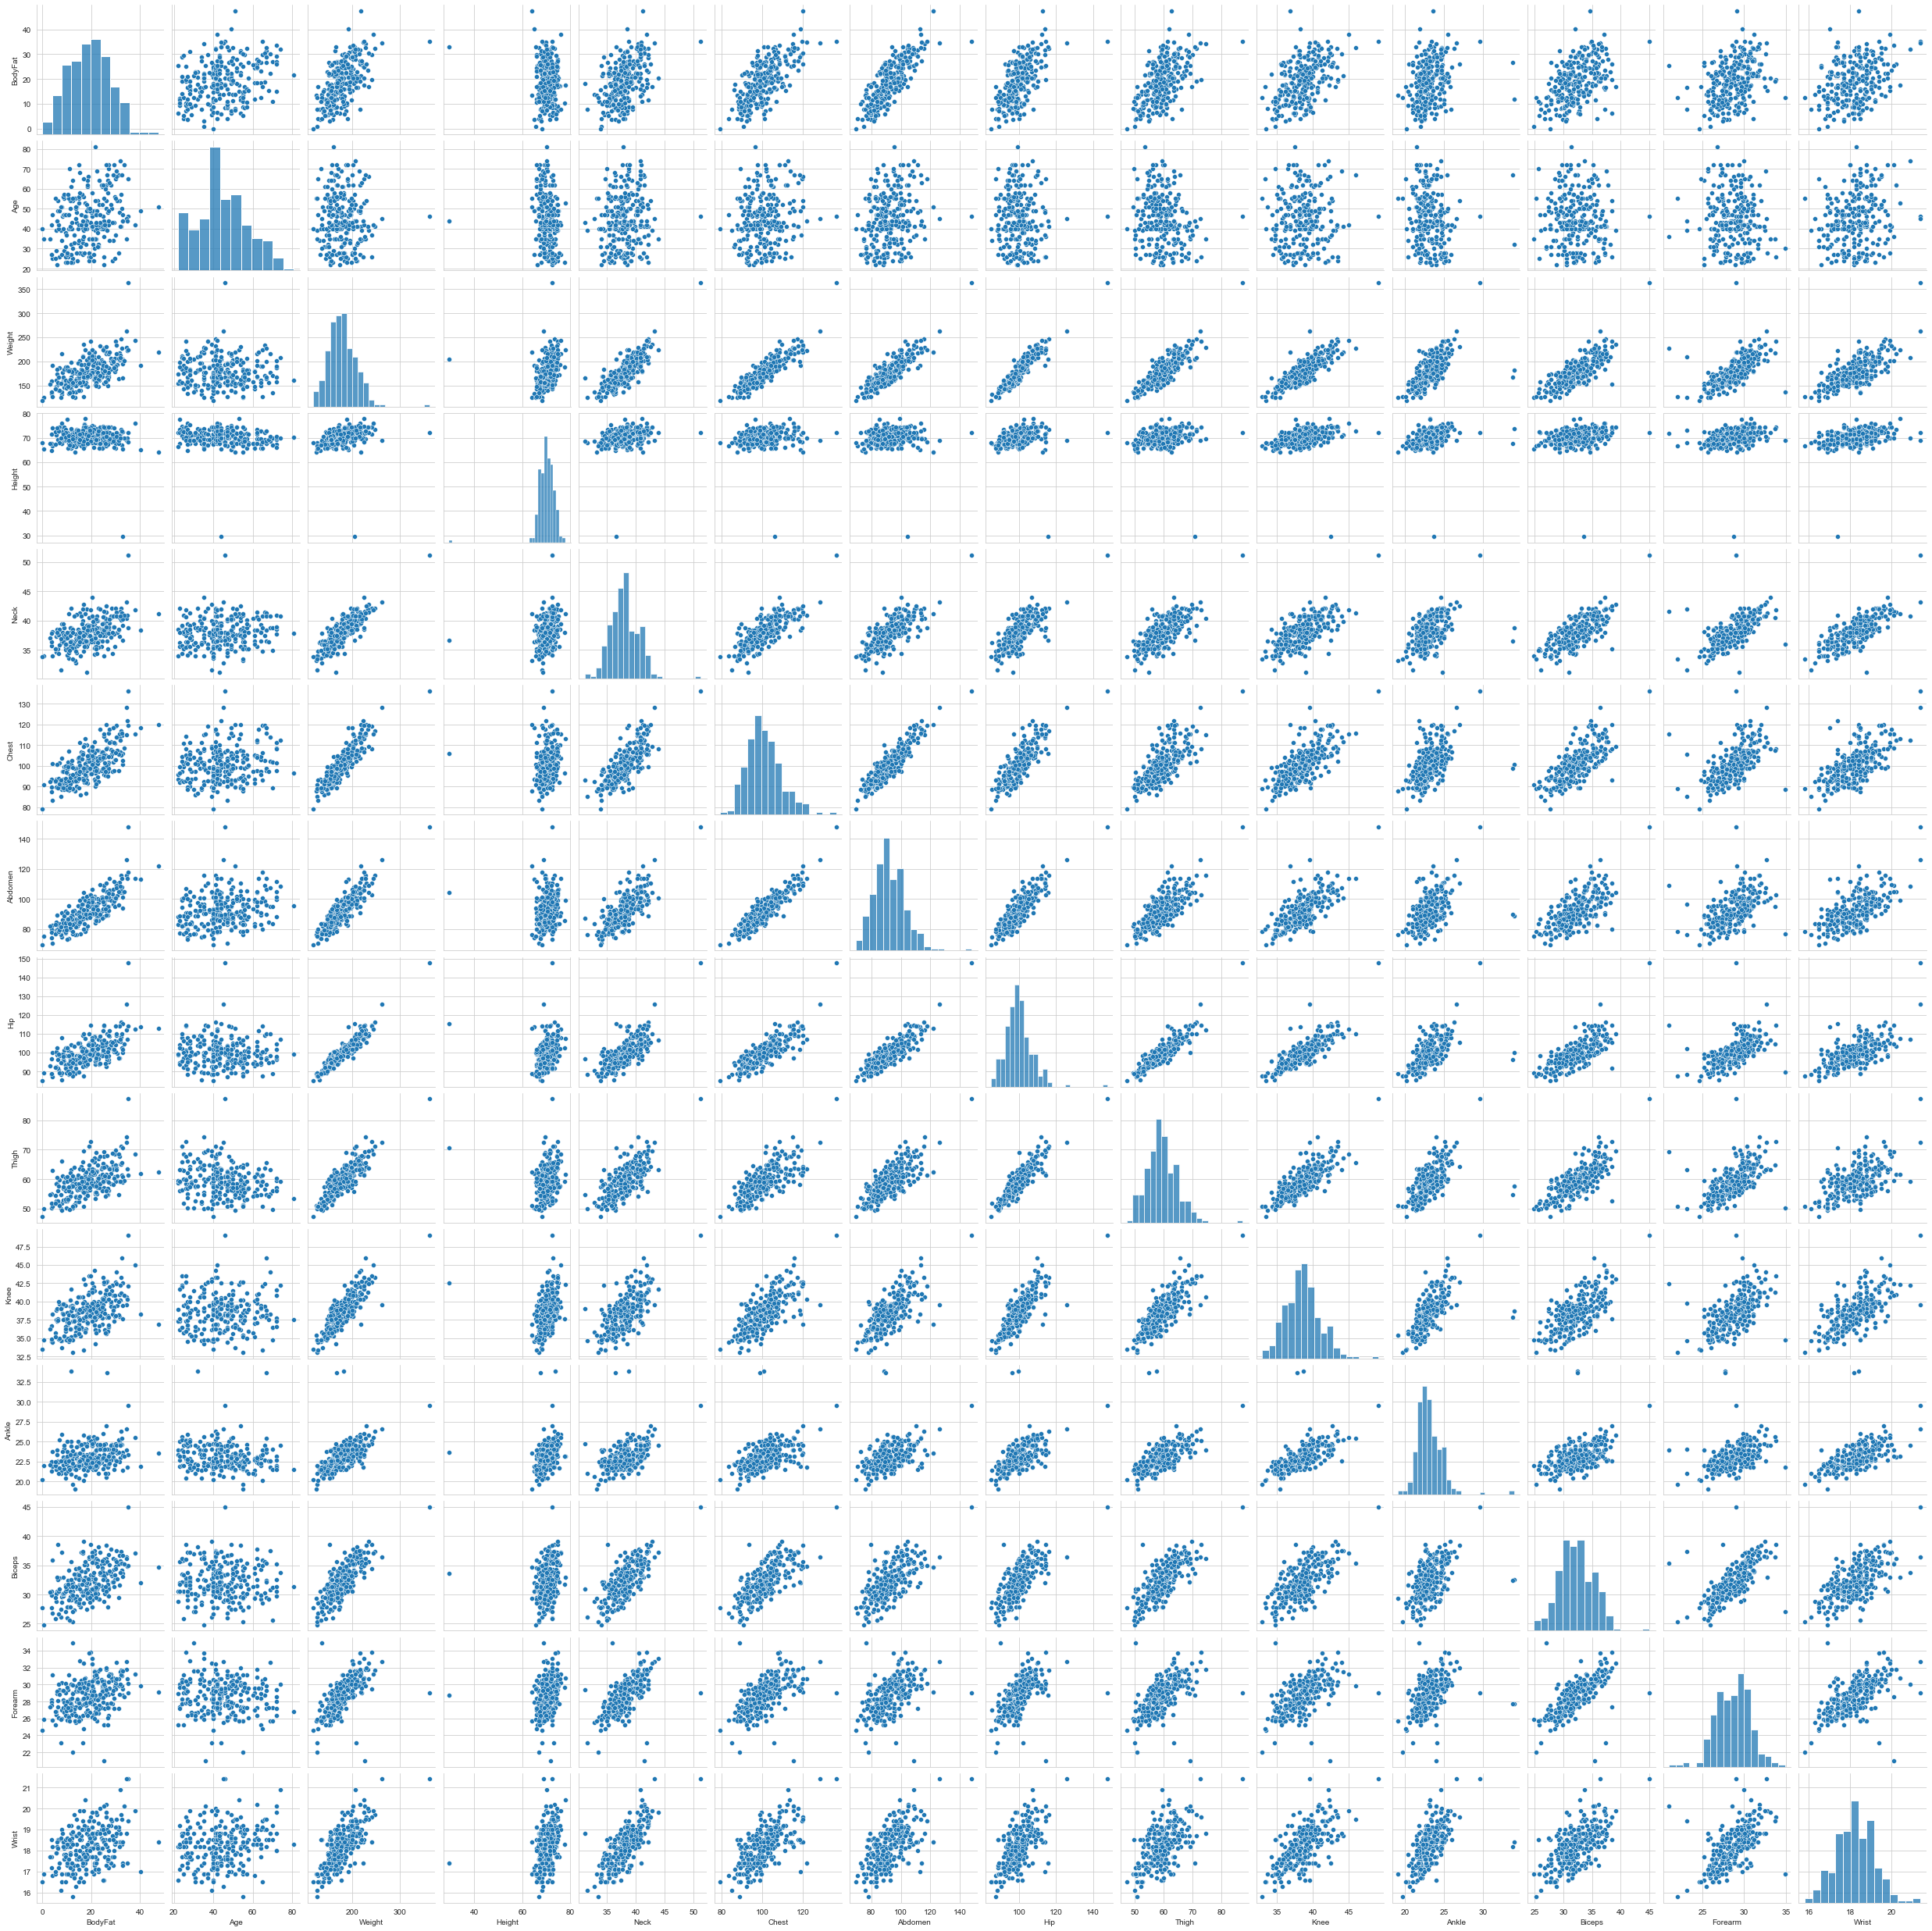

In [10]:
sns.pairplot(data)

<AxesSubplot:>

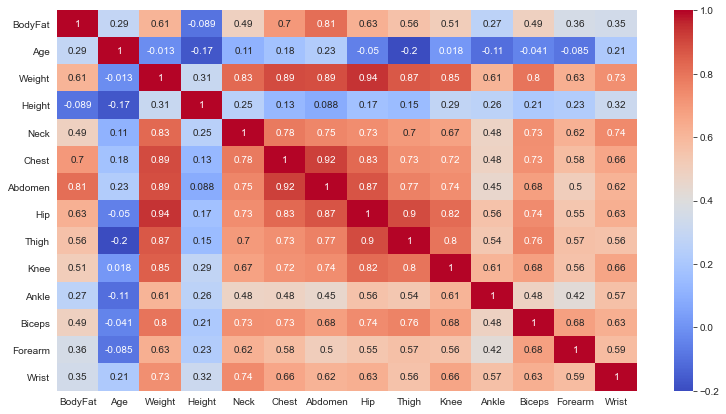

In [11]:
plt.figure(figsize=(13,7))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

<AxesSubplot:xlabel='Abdomen', ylabel='Density'>

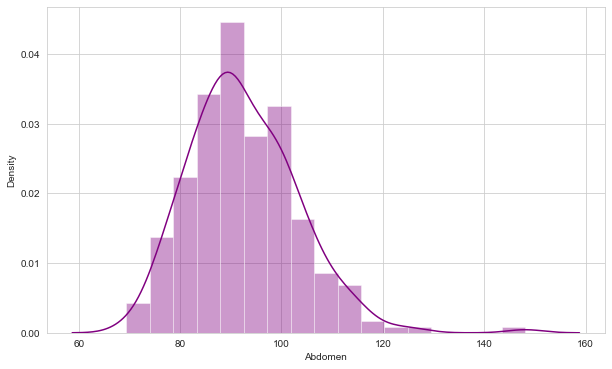

In [12]:
plt.figure(figsize=(10,6))
sns.distplot(data['Abdomen'],color='purple')

<AxesSubplot:xlabel='Weight', ylabel='Density'>

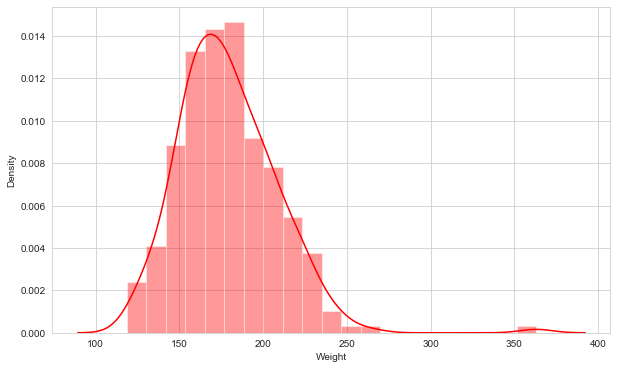

In [13]:
plt.figure(figsize=(10,6))
sns.distplot(data['Weight'],color='red')

<AxesSubplot:xlabel='BodyFat', ylabel='Density'>

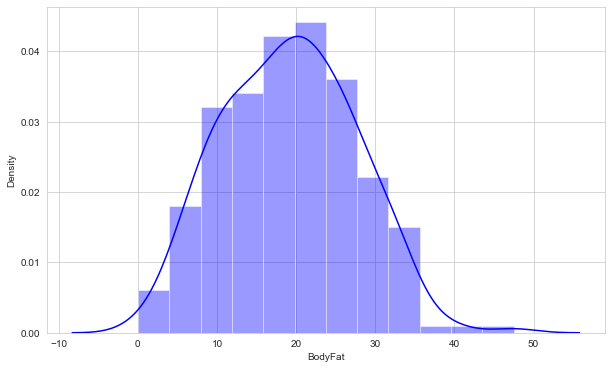

In [14]:
plt.figure(figsize=(10,6))
sns.distplot(data['BodyFat'],color='blue')

<AxesSubplot:xlabel='Weight', ylabel='BodyFat'>

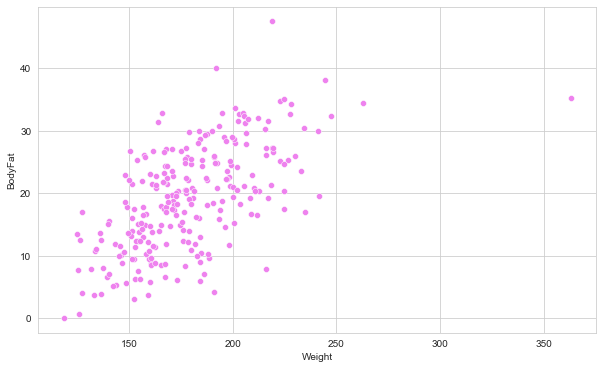

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Weight',y='BodyFat',data=data,color='violet')

<Figure size 720x432 with 0 Axes>

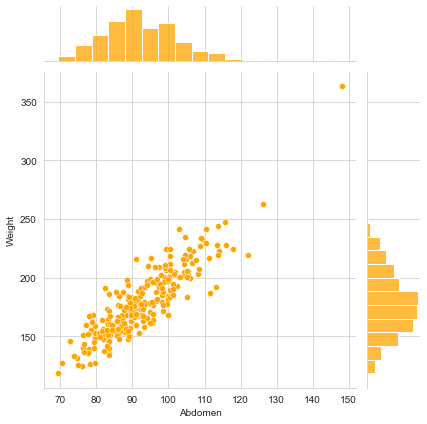

In [16]:
plt.figure(figsize=(10,6))
sns.jointplot(x='Abdomen',y='Weight',data=data,color='orange')

<Figure size 720x432 with 0 Axes>

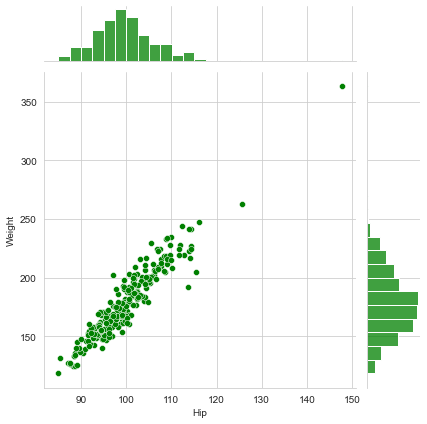

In [17]:
plt.figure(figsize=(10,6))
sns.jointplot(x='Hip',y='Weight',data=data,color='green')

In [18]:
X = data.drop('BodyFat',axis=1)
y = df['BodyFat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=102)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

performance = []

In [19]:
lr = LinearRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)

mea = mean_absolute_error(y_test,predictions)
mse = mean_squared_error(y_test,predictions)
rmse = np.sqrt(mean_squared_error(y_test,predictions))

print("Mean Absolute Error: " + str(mea))
print("Mean Squared Error: " + str(mse))
print("Root Mean Absolute Error: " + str(rmse))

performance.append(rmse)

Mean Absolute Error: 3.4637178183189956
Mean Squared Error: 17.979739204507812
Root Mean Absolute Error: 4.240252257178553


In [20]:
lasso = Lasso(alpha=0.5)
lasso.fit(X_train,y_train)
predictions = lasso.predict(X_test)

mea = mean_absolute_error(y_test,predictions)
mse = mean_squared_error(y_test,predictions)
rmse = np.sqrt(mean_squared_error(y_test,predictions))

print("Mean Absolute Error: " + str(mea))
print("Mean Squared Error: " + str(mse))
print("Root Mean Absolute Error: " + str(rmse))

performance.append(rmse)

Mean Absolute Error: 3.7262727355101735
Mean Squared Error: 21.67266350593936
Root Mean Absolute Error: 4.655390800560073


In [21]:
ridge = Ridge(alpha=0.5)
ridge.fit(X_train,y_train)
predictions = ridge.predict(X_test)

mea = mean_absolute_error(y_test,predictions)
mse = mean_squared_error(y_test,predictions)
rmse = np.sqrt(mean_squared_error(y_test,predictions))

print("Mean Absolute Error: " + str(mea))
print("Mean Squared Error: " + str(mse))
print("Root Mean Absolute Error: " + str(rmse))

performance.append(rmse)

Mean Absolute Error: 3.4945532758703854
Mean Squared Error: 18.09252948504534
Root Mean Absolute Error: 4.25353141343112


In [22]:
en = ElasticNet(alpha=0.5)
en.fit(X_train,y_train)
predictions = en.predict(X_test)

mea = mean_absolute_error(y_test,predictions)
mse = mean_squared_error(y_test,predictions)
rmse = np.sqrt(mean_squared_error(y_test,predictions))

print("Mean Absolute Error: " + str(mea))
print("Mean Squared Error: " + str(mse))
print("Root Mean Absolute Error: " + str(rmse))

performance.append(rmse)

Mean Absolute Error: 4.014596974186647
Mean Squared Error: 24.597880331392922
Root Mean Absolute Error: 4.959625019232091


In [23]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
predictions = rf.predict(X_test)

mea = mean_absolute_error(y_test,predictions)
mse = mean_squared_error(y_test,predictions)
rmse = np.sqrt(mean_squared_error(y_test,predictions))

print("Mean Absolute Error: " + str(mea))
print("Mean Squared Error: " + str(mse))
print("Root Mean Absolute Error: " + str(rmse))

performance.append(rmse)

Mean Absolute Error: 3.493000000000001
Mean Squared Error: 17.706037603174607
Root Mean Absolute Error: 4.2078542754205035


In [24]:
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)
predictions = gb.predict(X_test)

mea = mean_absolute_error(y_test,predictions)
mse = mean_squared_error(y_test,predictions)
rmse = np.sqrt(mean_squared_error(y_test,predictions))

print("Mean Absolute Error: " + str(mea))
print("Mean Squared Error: " + str(mse))
print("Root Mean Absolute Error: " + str(rmse))

performance.append(rmse)

Mean Absolute Error: 3.7543346214041664
Mean Squared Error: 21.05207151055846
Root Mean Absolute Error: 4.588253644967599


In [25]:
ab = AdaBoostRegressor()
ab.fit(X_train,y_train)
predictions = ab.predict(X_test)

mea = mean_absolute_error(y_test,predictions)
mse = mean_squared_error(y_test,predictions)
rmse = np.sqrt(mean_squared_error(y_test,predictions))

print("Mean Absolute Error: " + str(mea))
print("Mean Squared Error: " + str(mse))
print("Root Mean Absolute Error: " + str(rmse))

performance.append(rmse)

Mean Absolute Error: 3.620916748934392
Mean Squared Error: 18.572912601131346
Root Mean Absolute Error: 4.3096302162867


In [26]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
predictions = dt.predict(X_test)

mea = mean_absolute_error(y_test,predictions)
mse = mean_squared_error(y_test,predictions)
rmse = np.sqrt(mean_squared_error(y_test,predictions))

print("Mean Absolute Error: " + str(mea))
print("Mean Squared Error: " + str(mse))
print("Root Mean Absolute Error: " + str(rmse))

performance.append(rmse)

Mean Absolute Error: 4.9555555555555575
Mean Squared Error: 37.33936507936508
Root Mean Absolute Error: 6.110594494757861


In [27]:
knr = KNeighborsRegressor(n_neighbors=40)
knr.fit(X_train,y_train)
predictions = knr.predict(X_test)

mea = mean_absolute_error(y_test,predictions)
mse = mean_squared_error(y_test,predictions)
rmse = np.sqrt(mean_squared_error(y_test,predictions))

print("Mean Absolute Error: " + str(mea))
print("Mean Squared Error: " + str(mse))
print("Root Mean Absolute Error: " + str(rmse))

performance.append(rmse)

Mean Absolute Error: 4.656388888888888
Mean Squared Error: 32.331301686507935
Root Mean Absolute Error: 5.686062054401793


<AxesSubplot:>

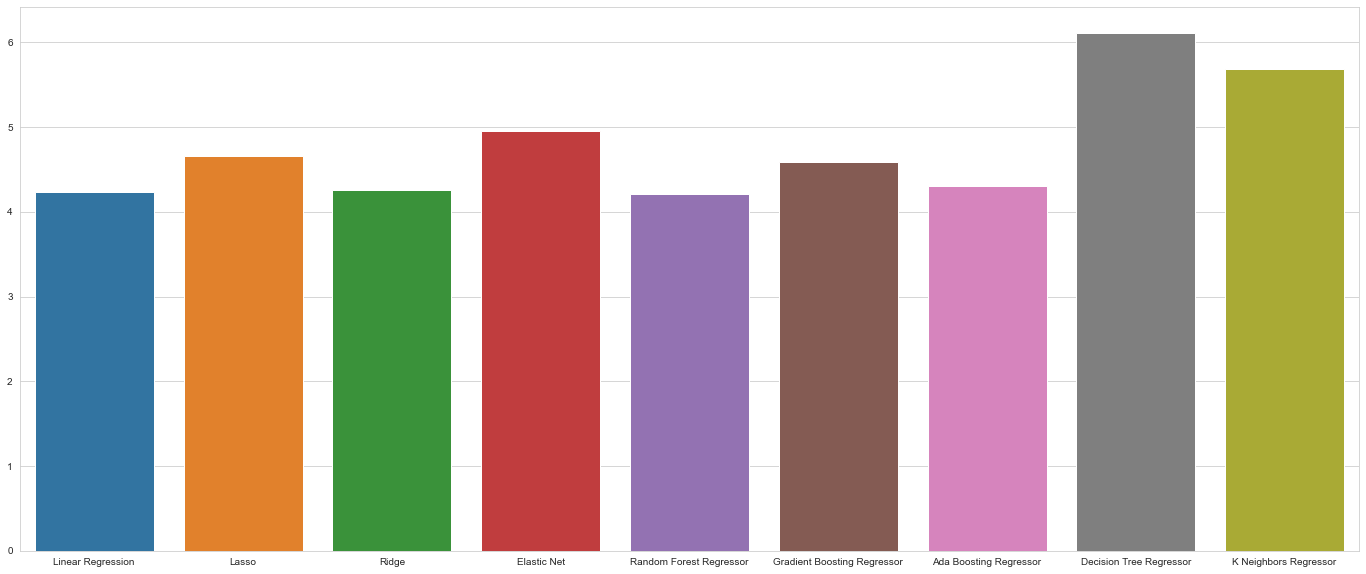

In [34]:
plt.figure(figsize=(24,10))
model_name = ['Linear Regression','Lasso','Ridge','Elastic Net','Random Forest Regressor',
              'Gradient Boosting Regressor','Ada Boosting Regressor',
              'Decision Tree Regressor','K Neighbors Regressor']
sns.barplot(x=model_name,y=performance)